## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

---
---
# **Setup Environment**

## Development Environment
* Local development with Visual Studio Code.
* Jupyter Notebook and Python 3.11.7 with Anaconda3. 
* Google Colab/Drive not used.
* Generated HTML using the jupyter cli

   ```jupyter nbconvert --to html RobBarker_CV_PlantSeeding_FC.html.ipynb```

* Added --- (markdown) lines for easier readability for myself. 

## Formatting Notes
* Moved helper functions into separate sections according to task.
* Added line separators for readability.

## Installing and Importing Necessary Libraries

In [2]:
# Installing the libraries with the specified version.
# Uncomment and run the following line if Google Colab is being used
#!pip install -U sentence-transformers gensim transformers tqdm -q

# Install the required libraries
%pip install -U sentence-transformers gensim transformers tqdm -q

# Upgrade the click package to resolve the dependency conflict
%pip install click --upgrade

# Check the version of scikit-learn
import sklearn
print(sklearn.__version__)

# Reinstall scikit-learn if necessary
%pip install --upgrade scikit-learn

# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json

# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To suppress warnings.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
1.5.2
Note: you may need to restart the kernel to use updated packages.


## Loading the dataset

In [93]:
# Load dataset.
stocknews_df_org = pd.read_csv("/Users/barkz/Desktop/GL Projects/Stock-Market-News-Sentiment-Analysis-and-Summarization/stock_news.csv")
stocknews_df = stocknews_df_org.copy()

---
---
# **Data Overview**

Summarization of all the data set elements that include:, Top 5 rows, bottom 5 rows, data info/type, data shape, image information (size, pixels, color) and distribution.

In [94]:
stocknews_df.shape

(349, 8)

**Observations:**
* There are 349 records and 8 columns.

In [95]:
stocknews_df.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [96]:
stocknews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


**Observations:**
* There are 2 object datatypes.
* There are 4 float64 datatypes.
* There are 2 int64 datatypes.

In [97]:
stocknews_df.isnull().sum()

Date      0
News      0
Open      0
High      0
Low       0
Close     0
Volume    0
Label     0
dtype: int64

**Observations:**
* There are no nulls values.

In [98]:
stocknews_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,349.0,4.622923e+01,6.442817e+00,3.756750e+01,4.174000e+01,4.597500e+01,5.070750e+01,6.681750e+01
High,349.0,4.670046e+01,6.507321e+00,3.781750e+01,4.224500e+01,4.602500e+01,5.085000e+01,6.706250e+01
Low,349.0,4.574539e+01,6.391976e+00,3.730500e+01,4.148250e+01,4.564000e+01,4.977750e+01,6.586250e+01
Close,349.0,4.492632e+01,6.398338e+00,3.625413e+01,4.024691e+01,4.459692e+01,4.911079e+01,6.480523e+01
Volume,349.0,1.289482e+08,4.317031e+07,4.544800e+07,1.032720e+08,1.156272e+08,1.511252e+08,2.444392e+08
Label,349.0,-5.444126e-02,7.151192e-01,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [99]:
stocknews_df.columns.tolist()

['Date', 'News', 'Open', 'High', 'Low', 'Close', 'Volume', 'Label']

In [100]:
stocknews_df.nunique()

Date       71
News      349
Open       70
High       70
Low        71
Close      71
Volume     71
Label       3
dtype: int64

In [101]:
stocknews_df.duplicated().sum()

0

**Observations:**
* There are no duplicate values.

In [102]:
stocknews_df.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 349 entries, 0 to 348
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
349 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


In [103]:
stocknews_df["Date"] = pd.to_datetime(stocknews_df["Date"])
stocknews_df["Date"].dt.year.value_counts()

2019    349
Name: Date, dtype: int64

**Observations:**
* Date column is of object and needs to be converted to date/time.
* There are 349 entries.

---
---
# **Exploratory Data Analysis**

## Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content

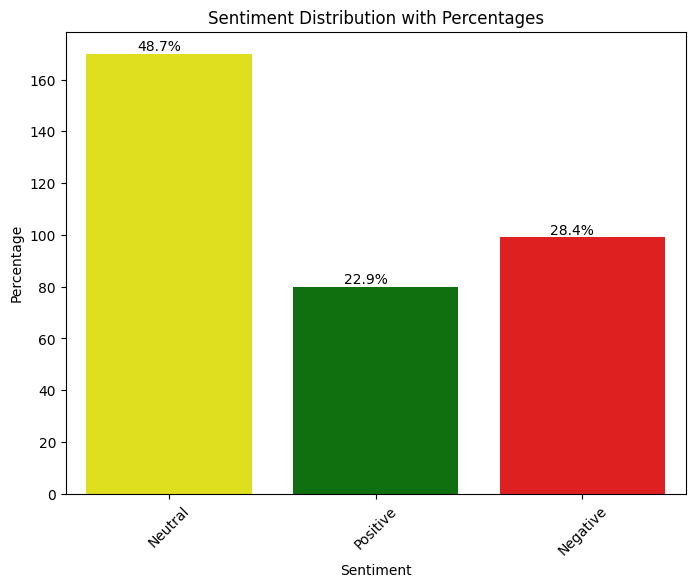

In [112]:
# Define the dataframes for each sentiment
stocknews_df = stocknews_df_org.copy()
stocknews_df = pd.DataFrame(stocknews_df)

# Create a mapping for the sentiment labels
sentiment_mapping = {0: 'Neutral', 1: 'Positive', -1: 'Negative'}

# Map the sentiment labels to the DataFrame
stocknews_df['Label'] = stocknews_df['Label'].map(sentiment_mapping)

# Define a custom color palette
custom_palette = {'Neutral': 'yellow', 'Positive': 'green', 'Negative': 'red'}

# Create the countplot with custom labels and colors
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=stocknews_df, x="Label", order=['Neutral', 'Positive', 'Negative'], palette=custom_palette)

# Add percentage values to the countplot
total = len(stocknews_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set plot labels and title
ax.set_xlabel('Sentiment')
ax.set_ylabel('Percentage')
ax.set_title('Sentiment Distribution with Percentages')

# Show the plot
plt.show()

**Observations**
* 49% Neutral (0)
* 23% Positive (1)
* 28% Negative (-1)

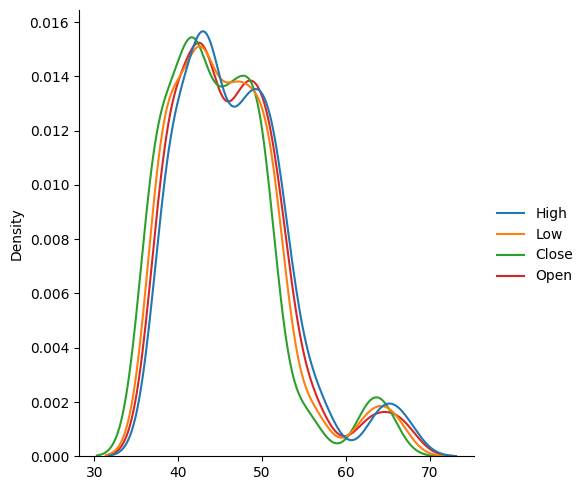

In [117]:
sns.displot(data=stocknews_df[['High','Low','Close','Open']], kind="kde", palette="tab10")

**Observations**
* df
* df
* df

<Axes: xlabel='Volume', ylabel='Count'>

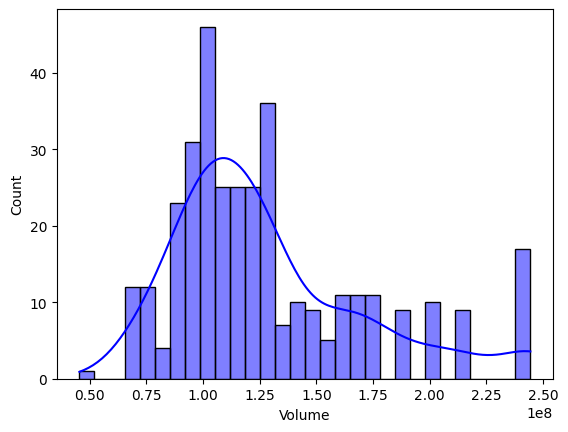

In [118]:
sns.histplot(stocknews_df, x='Volume', bins=30, kde=True, color='blue')

**Observations**
* df
* df
* df

In [119]:
# Calculating the total number of words present in the news content.
stocknews_df['news_len'] = stocknews_df['News'].apply(lambda x: len(x.split(' ')))

# Displaying the statistics of the news length.
stocknews_df['news_len'].describe().T

count    349.000000
mean      49.312321
std        5.727770
min       19.000000
25%       46.000000
50%       50.000000
75%       53.000000
max       61.000000
Name: news_len, dtype: float64

**Observations**
* The dataset contains 349 news articles.
* The average length of the news articles is approximately 49.31 words.
* The lengths of the news articles vary, with a standard deviation of approximately 5.73 words.
* The shortest news article contains 19 words, while the longest contains 61 words.
* The median length of the news articles is 50 words, indicating that half of the articles have 50 words or fewer.
* The 25th and 75th percentiles are 46 and 53 words, respectively, indicating the range within which the middle 50% of the news article lengths fall.

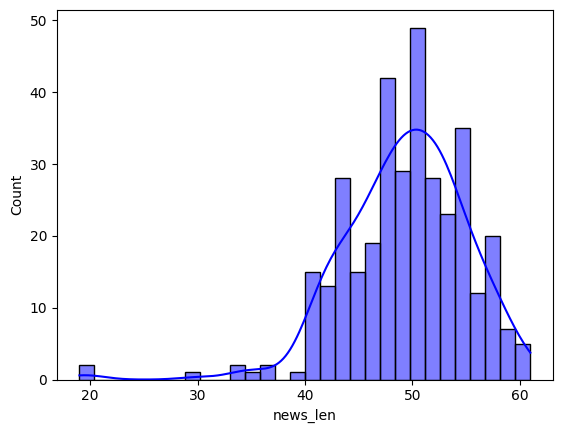

In [121]:
# Histogram of news_len column
sns.histplot(data=stocknews_df,x="news_len",kde=True,bins=30,color='blue',); 

**Observations**
* Length of news articles is left skewed.

---
## Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

#### Correlation

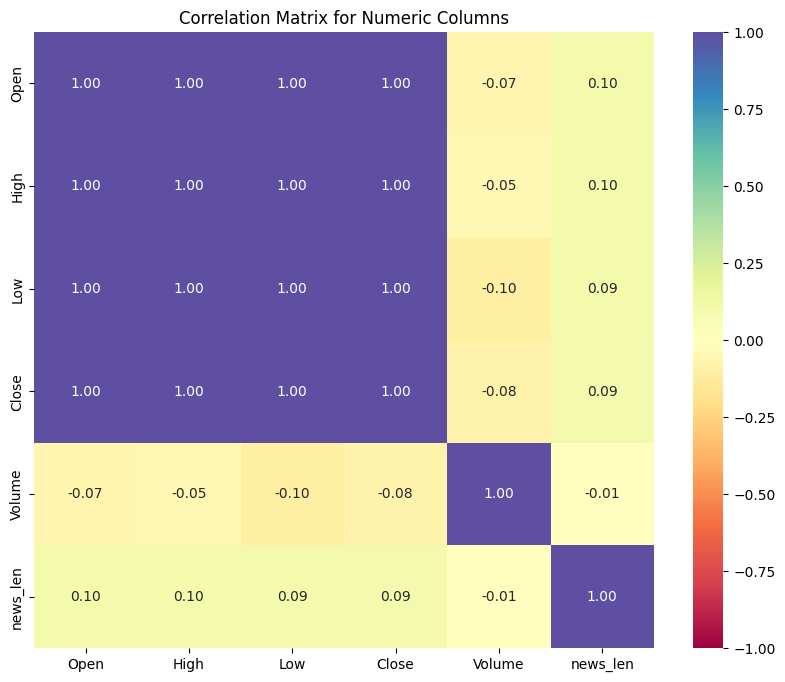

In [124]:
# Select only the numeric columns from the stocknews_df DataFrame
numeric_columns = stocknews_df.select_dtypes(include='number')

# Plot the correlation matrix fir the numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(
    numeric_columns.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

# Set plot labels and title
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

**Observations**
* df
* df
* df

#### Label vs Price (Open, High, Low, Close)

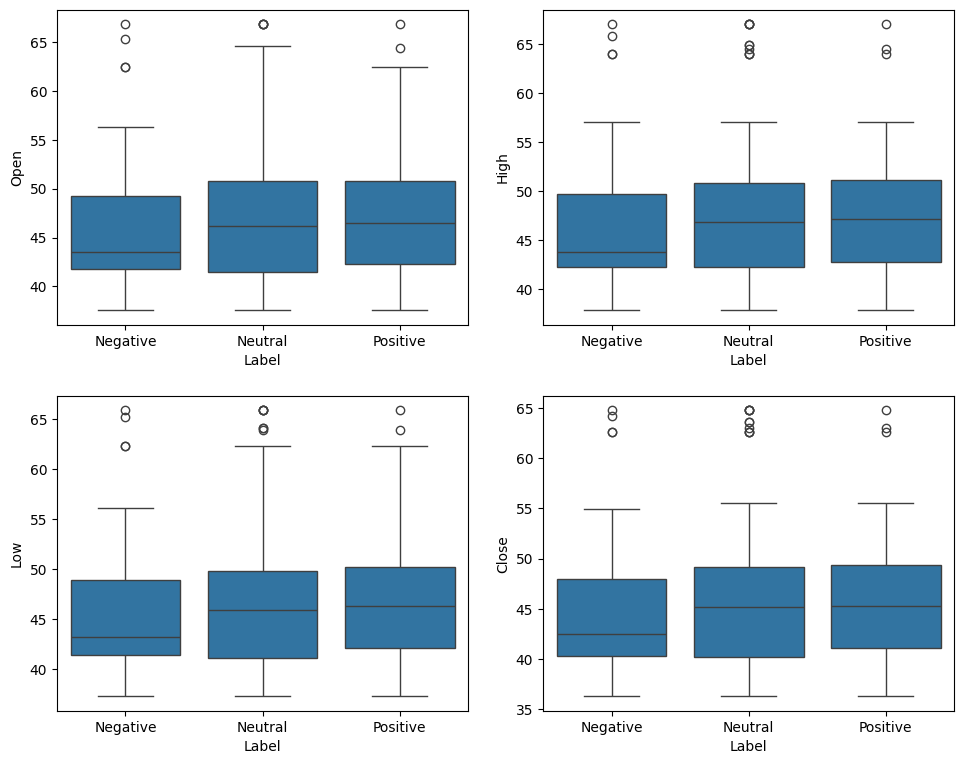

In [125]:
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=stocknews_df, x="Label", y=variable)
    plt.tight_layout(pad=2)

plt.show()

#### Label vs Volume

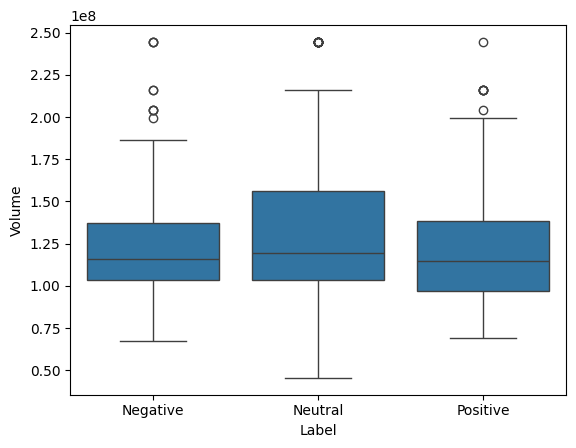

In [126]:
# Boxplot of Label vs Volume
sns.boxplot(
    data=stocknews_df, x="Label", y="Volume"  
)

**Observations**
* df
* df
* df

#### Date vs Price (Open, High, Low, Close)

In [127]:
stock_daily = stocknews_df.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group the 'stocks' DataFrame by the 'Date' column

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.740002,42.244999,41.482498,40.246914,130672400.0
2019-01-03,43.570000,43.787498,43.222500,42.470604,103544800.0
2019-01-04,47.910000,47.919998,47.095001,46.419842,111448000.0
2019-01-07,50.792500,51.122501,50.162498,49.110790,109012000.0
2019-01-08,53.474998,54.507500,51.685001,50.787209,216071600.0


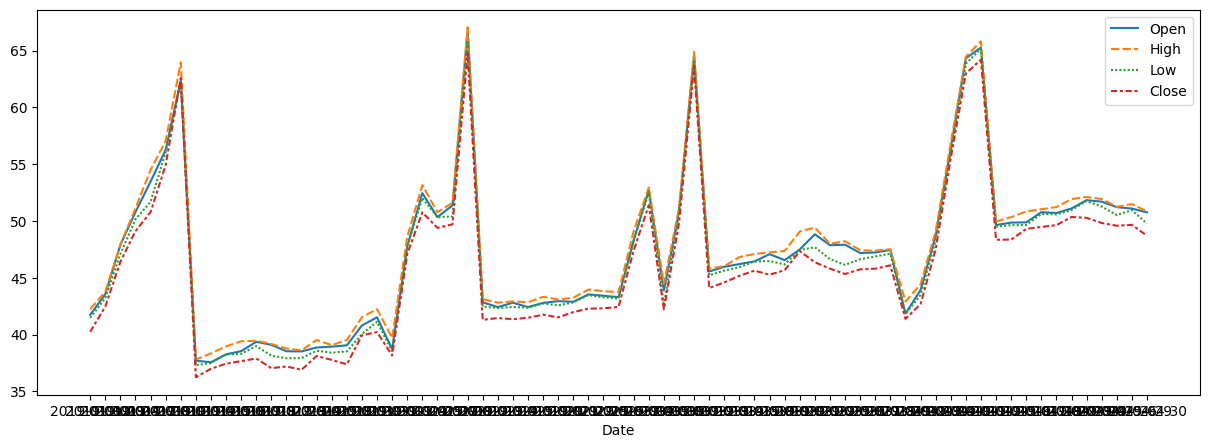

In [128]:
# Lineplot of all the variables except Volume
plt.figure(figsize=(15,5))
sns.lineplot(stock_daily.drop("Volume", axis=1)); 

**Observations**
* df
* df
* df

#### Volume vs Close Price

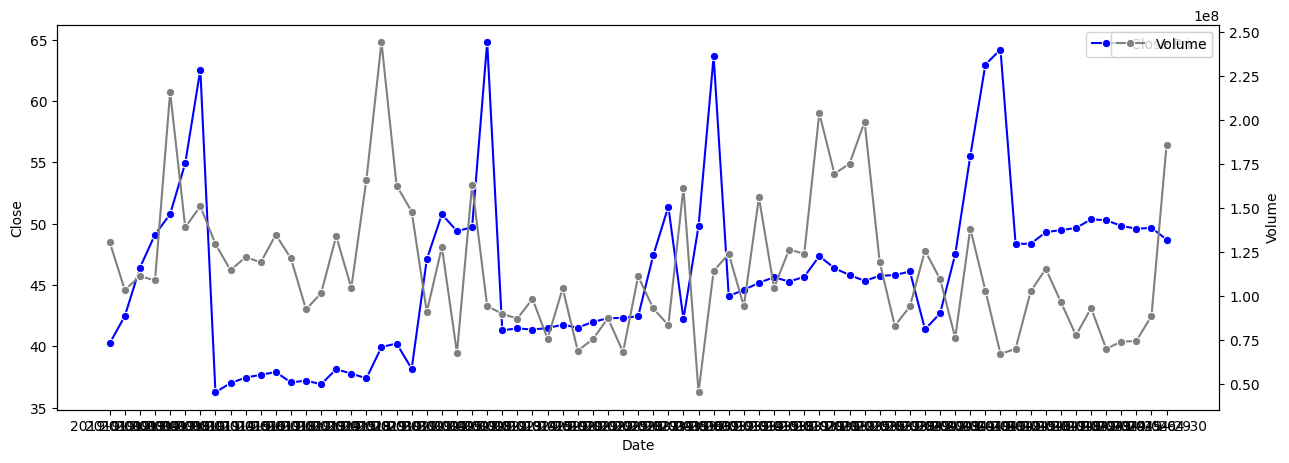

In [129]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));

**Observations**
* df
* df
* df

---
---
# **Data Preprocessing**

### Statistical Summary

In [133]:
# Statistical summary of the 'Date' column
stocknews_df["Date"].describe()

count            349
unique            71
top       2019-01-03
freq              28
Name: Date, dtype: object

In [134]:
# Ensure the 'Date' column is in datetime format
stocknews_df['Date'] = pd.to_datetime(stocknews_df['Date'])

# Extract relevant date components for summarization
stocknews_df['Year'] = stocknews_df['Date'].dt.year
stocknews_df['Month'] = stocknews_df['Date'].dt.month
stocknews_df['Day'] = stocknews_df['Date'].dt.day

# Print the statistical summary of the 'Date' column components
print("Year Summary:")
print(stocknews_df['Year'].describe())
print("\nMonth Summary:")
print(stocknews_df['Month'].describe())
print("\nDay Summary:")
print(stocknews_df['Day'].describe())

Year Summary:
count     349.0
mean     2019.0
std         0.0
min      2019.0
25%      2019.0
50%      2019.0
75%      2019.0
max      2019.0
Name: Year, dtype: float64

Month Summary:
count    349.000000
mean       2.077364
std        1.177997
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Month, dtype: float64

Day Summary:
count    349.000000
mean      15.389685
std        9.351840
min        1.000000
25%        6.000000
50%       15.000000
75%       24.000000
max       31.000000
Name: Day, dtype: float64


**Observations**
* All entries in the dataset are from the year 2019.
* The entries are concentrated in the first four months of the year, with a significant number of entries from January and February.
* The entries are spread throughout the days of the month, with a relatively even distribution.

### Train-test-validation Split

In [135]:
# Select all rows where the 'Date' is before '2019-04-01'
X_train = stocknews_df[(stocknews_df['Date'] < '2019-04-01')].reset_index()

# Select all rows where the 'Date' is from '2019-04-01 to '2019-04-16' (excluded)
X_val = stocknews_df[(stocknews_df['Date'] >= '2019-04-01') & (stocknews_df['Date'] < '2019-04-16')].reset_index()

# Select all rows where the 'Date' is from '2019-04-16' till the end.
X_test = stocknews_df[stocknews_df['Date'] >= '2019-04-16'].reset_index()    

In [136]:
# Set 'Label' column as the target variable
y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()

In [137]:
# Complete the code to print the shape of X_train,X_val,X_test,y_train,y_val and y_test
print("Train data shape: ",X_train.shape)
print("Validation data shape: ",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape: ",y_train.shape)
print("Validation label shape: ",y_val.shape)
print("Test label shape: ",y_test.shape)

Train data shape:  (286, 13)
Validation data shape:  (21, 13)
Test data shape  (42, 13)
Train label shape:  (286,)
Validation label shape:  (21,)
Test label shape:  (42,)


In [138]:
X_train.head()

,index,Date,News,Open,High,Low,Close,Volume,Label,news_len,Year,Month,Day
0,0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,Negative,46,2019,1,2
1,1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,Negative,51,2019,1,2
2,2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,Negative,49,2019,1,2
3,3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,Negative,51,2019,1,2
4,4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,Negative,50,2019,1,2


In [141]:
X_val.head()

,index,Date,News,Open,High,Low,Close,Volume,Label,news_len,Year,Month,Day
0,286,2019-04-02,"Apple and other consumer brands, including LV...",41.852501,42.915001,41.8200,41.390125,125982000,Neutral,45,2019,4,2
1,287,2019-04-02,Swatch Group successfully defended its use of...,41.852501,42.915001,41.8200,41.390125,125982000,Neutral,47,2019,4,2
2,288,2019-04-02,"In premarket trade Tuesday, Apple's NASDAQ AA...",41.852501,42.915001,41.8200,41.390125,125982000,Neutral,35,2019,4,2
3,289,2019-04-02,"In US markets, futures for the Dow, S&P 500, ...",41.852501,42.915001,41.8200,41.390125,125982000,Negative,47,2019,4,2
4,290,2019-04-03,"Japan Display, a key Apple supplier, is set t...",43.922501,44.437500,43.4925,42.684212,109744800,Positive,56,2019,4,3


In [144]:
X_test.head()

,index,Date,News,Open,High,Low,Close,Volume,Label,news_len,Year,Month,Day
0,307,2019-04-16,"In a complex trial in San Diego, Apple accuse...",49.865002,50.342499,49.639999,48.364113,102785600,Neutral,54,2019,4,16
1,308,2019-04-17,"Taiwan business tycoon Terry Gou, chairman of...",49.884998,50.845001,49.652500,49.305897,115627200,Neutral,44,2019,4,17
2,309,2019-04-17,"Chinese video-sharing app TikTok, owned by By...",49.884998,50.845001,49.652500,49.305897,115627200,Neutral,52,2019,4,17
3,310,2019-04-17,"TomTom, a Dutch navigation and digital maps f...",49.884998,50.845001,49.652500,49.305897,115627200,Positive,48,2019,4,17
4,311,2019-04-17,"In a volatile trading session, the S&P 500 wa...",49.884998,50.845001,49.652500,49.305897,115627200,Positive,49,2019,4,17


In [142]:
y_train.head()

0    Negative
1    Negative
2    Negative
3    Negative
4    Negative
Name: Label, dtype: object

In [143]:
y_val.head()

0     Neutral
1     Neutral
2     Neutral
3    Negative
4    Positive
Name: Label, dtype: object

In [145]:
y_test.head()

0     Neutral
1     Neutral
2     Neutral
3    Positive
4    Positive
Name: Label, dtype: object

---
---
# **Word Embeddings**

### Word2Vec

In [146]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in stocknews_df['News'].values]

In [147]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [148]:
# Checking the size of the vocabulary
print("Length of the vocabulary is ", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is  4682


#### Review Embeddings

In [149]:
# Checking the word embedding of a random word
word = "stock"
model_W2V.wv[word]

array([ 4.25637979e-03,  4.32400033e-02,  5.90966130e-03,  2.40118261e-02,
       -4.38744435e-03, -5.01582660e-02,  3.53526510e-02,  8.41019228e-02,
        1.02291098e-02, -1.47978747e-02,  1.19092893e-02, -2.23921277e-02,
        1.37537159e-03,  1.21555543e-02, -2.90587805e-02, -2.47421265e-02,
        2.16012467e-02, -1.20804515e-02, -1.61911652e-03, -1.43914334e-02,
       -2.75034290e-02,  3.06759169e-03,  3.74496952e-02,  7.24408915e-03,
        1.51062673e-02,  6.41491916e-03, -4.45894711e-02,  6.25761831e-03,
       -1.88159905e-02, -3.58549692e-02,  1.41559495e-02, -2.14823410e-02,
        3.08281812e-03, -2.71334685e-03, -5.15447371e-03,  1.64517574e-02,
        1.64492261e-02, -3.78544554e-02,  1.70136127e-03, -1.04967076e-02,
       -1.60861965e-02, -2.05701077e-03, -1.81840407e-03, -2.59166993e-02,
        1.61275733e-02,  3.96334119e-02, -1.61035714e-04,  9.26865637e-03,
       -2.12359428e-03,  2.71581039e-02,  1.99140403e-02,  5.42046083e-03,
       -1.70222968e-02,  

In [150]:
# Checking the word embedding of a random word
word = "stock"
model_W2V.wv[word]

array([ 4.25637979e-03,  4.32400033e-02,  5.90966130e-03,  2.40118261e-02,
       -4.38744435e-03, -5.01582660e-02,  3.53526510e-02,  8.41019228e-02,
        1.02291098e-02, -1.47978747e-02,  1.19092893e-02, -2.23921277e-02,
        1.37537159e-03,  1.21555543e-02, -2.90587805e-02, -2.47421265e-02,
        2.16012467e-02, -1.20804515e-02, -1.61911652e-03, -1.43914334e-02,
       -2.75034290e-02,  3.06759169e-03,  3.74496952e-02,  7.24408915e-03,
        1.51062673e-02,  6.41491916e-03, -4.45894711e-02,  6.25761831e-03,
       -1.88159905e-02, -3.58549692e-02,  1.41559495e-02, -2.14823410e-02,
        3.08281812e-03, -2.71334685e-03, -5.15447371e-03,  1.64517574e-02,
        1.64492261e-02, -3.78544554e-02,  1.70136127e-03, -1.04967076e-02,
       -1.60861965e-02, -2.05701077e-03, -1.81840407e-03, -2.59166993e-02,
        1.61275733e-02,  3.96334119e-02, -1.61035714e-04,  9.26865637e-03,
       -2.12359428e-03,  2.71581039e-02,  1.99140403e-02,  5.42046083e-03,
       -1.70222968e-02,  

In [152]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

print("Length of the dictionary is ", len(word_vector_dict))

Length of the dictionary is  4682


In [153]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [154]:
# Creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  0.33152294158935547


In [155]:
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(286, 300) (21, 300) (42, 300)


### GloVe

In [157]:
# Load the Stanford GloVe model
filename = '/Users/barkz/Desktop/GL Projects/Stock-Market-News-Sentiment-Analysis-and-Summarization/glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [158]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


#### Review Embeddings

In [159]:
# Checking the word embedding of a random word
word = "stock"
glove_model[word]

array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [160]:
# Checking the word embedding of a random word
word = "economy"
glove_model[word]

array([-0.19382  ,  1.017    ,  1.076    ,  0.02954  , -0.39192  ,
       -1.3891   , -0.87873  , -0.63162  ,  0.9643   , -0.43035  ,
       -0.34868  ,  0.22736  , -0.40296  ,  0.15641  , -0.16813  ,
       -0.15343  , -0.15799  , -0.27612  ,  0.18088  , -0.28386  ,
        0.49847  ,  0.29864  ,  0.32353  ,  0.18108  , -0.59623  ,
       -0.54165  , -0.70019  , -0.64956  , -0.69063  ,  0.18084  ,
       -0.38581  ,  0.56086  , -0.40313  , -0.38777  , -0.70615  ,
        0.20657  ,  0.34171  , -0.23393  , -0.35882  , -0.2201   ,
       -0.76182  , -1.2047   ,  0.4339   ,  1.1656   ,  0.1836   ,
       -0.21601  ,  0.93198  , -0.059616 , -0.11624  , -1.3259   ,
       -0.79772  , -0.0074957, -0.0889   ,  1.4749   ,  0.31157  ,
       -2.2952   , -0.058351 ,  0.39353  ,  1.4983   ,  0.74023  ,
       -0.20109  ,  0.098124 , -0.73081  , -0.32294  ,  0.16703  ,
        0.87431  , -0.041624 , -0.51022  ,  1.0737   , -0.4257   ,
        1.0581   ,  0.19859  , -0.60087  , -0.33906  ,  0.6024

In [161]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [162]:
vec_size=100

In [163]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [164]:
# Creating a dataframe of the vectorized documents
start = time.time()

X_train_gl = pd.DataFrame(X_train["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_val_gl = pd.DataFrame(X_val["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_test_gl = pd.DataFrame(X_test["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column

end = time.time()
print('Time taken ', (end-start))

Time taken  11.121623992919922


In [165]:
# Print the shapes of the final dataframes
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape) 

(286, 100) (21, 100) (42, 100)


### Sentence Transformer

#### Defining the model

In [166]:
# Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### Encoding the dataset

In [168]:
# Setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the device being used
print(f"Using device: {device}")

Using device: cpu


In [169]:
# Encoding the dataset
start = time.time()

# Apply Sentence Transformer on 'News' column
X_train_st = model.encode(X_train["News"].values, show_progress_bar=True, device=device) 

# Apply Sentence Transformer on 'News' column
X_val_st = model.encode(X_val["News"].values, show_progress_bar=True, device=device) 

# Apply Sentence Transformer on 'News' column
X_test_st = model.encode(X_test["News"].values, show_progress_bar=True, device=device) 

end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken  1.7992830276489258


In [170]:
# Print the shapes of the final dataframes
print(X_train_st.shape, X_val_st.shape, X_test_st.shape) 

(286, 384) (21, 384) (42, 384)


Each news content has been converted to a 384-dimensional vector.

---
---
# **Sentiment Analysis**

**NOTE**

All model performance data is tabulated in the **Model Summary** section at the end of the Sentiment Analysis section.

### Helper Functions

In [171]:
def plot_confusion_matrix(model, predictors, target):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display the plot.

In [172]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.

### Base Model - Word2Vec

In [385]:
# Building the model

#base_wv = GradientBoostingClassifier(random_state=42)
#base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

from sklearn.ensemble import AdaBoostClassifier
base_wv = AdaBoostClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_wv, y_train)

AdaBoostClassifier(random_state=42)

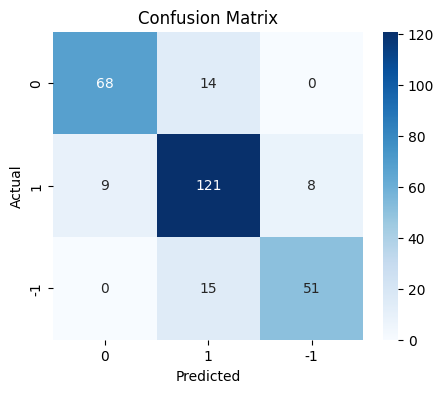

In [386]:
plot_confusion_matrix(base_wv,X_train_wv,y_train)

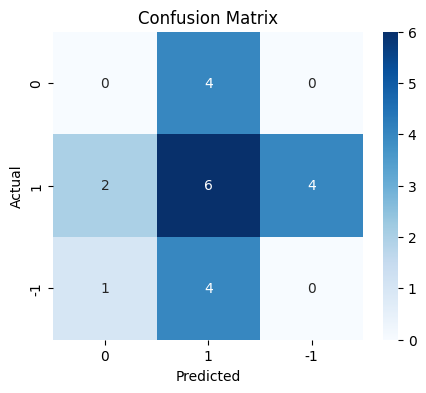

In [388]:
plot_confusion_matrix(base_wv,X_val_wv,y_val)

In [389]:
# Calculating different metrics on training data
base_train_wv = model_performance_classification_sklearn(base_wv,X_train_wv,y_train)
print("Training performance:\n", base_train_wv)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.839161  0.839161   0.841911  0.838995


In [390]:
# Calculating different metrics on validation data
base_val_wv = model_performance_classification_sklearn(base_wv,X_val_wv,y_val)
print("Validation performance:\n",base_val_wv)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.285714  0.285714   0.244898  0.263736


### Base Model - GloVe

In [391]:
# Building the model

#base_gl = GradientBoostingClassifier(random_state=42)
#base_gl = RandomForestClassifier(random_state=42)
#base_gl = DecisionTreeClassifier(random_state=42)

from sklearn.ensemble import AdaBoostClassifier
base_gl = AdaBoostClassifier(random_state=42)

# Fitting on train data
base_gl.fit(X_train_gl, y_train) #Complete the code to fit the chosen model on the train data

AdaBoostClassifier(random_state=42)

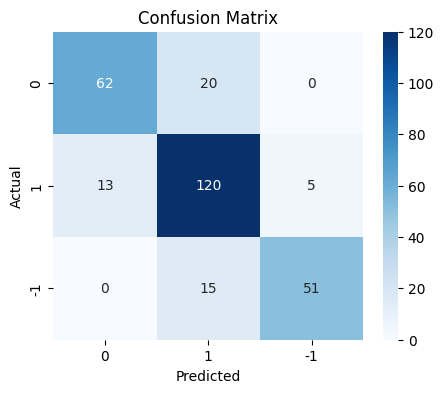

In [392]:
# Plot the confusion matrix for the train data
plot_confusion_matrix(base_gl,X_train_gl,y_train) 

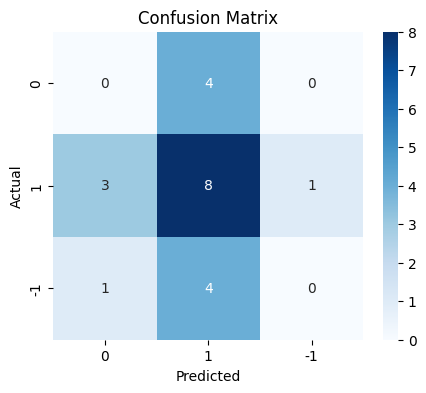

In [393]:
# Plot the confusion matrix for the validation data
plot_confusion_matrix(base_gl,X_val_gl,y_val) 

In [394]:
# Calculating different metrics on training data

# Compute the model performance for the training data
base_train_gl=model_performance_classification_sklearn(base_gl,X_train_gl,y_train)
print("Training performance:\n", base_train_gl)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.814685  0.814685   0.820743  0.814623


In [395]:
# Calculating different metrics on validation data

# Compute the model performance for the validation data
base_val_gl = model_performance_classification_sklearn(base_gl,X_val_gl,y_val) 
print("Validation performance:\n",base_val_gl)


Validation performance:
    Accuracy    Recall  Precision        F1
0  0.380952  0.380952   0.285714  0.326531


### Base Model - Sentence Transformer

In [396]:
# Building the model

#base_st = GradientBoostingClassifier(random_state=42)
#base_st = RandomForestClassifier(random_state=42)
#base_st = DecisionTreeClassifier(random_state=42)

from sklearn.ensemble import AdaBoostClassifier
base_st = AdaBoostClassifier(random_state=42)

# Fitting on train data
base_st.fit(X_train_st, y_train) #Complete the code to fit the chosen model on the train data

AdaBoostClassifier(random_state=42)

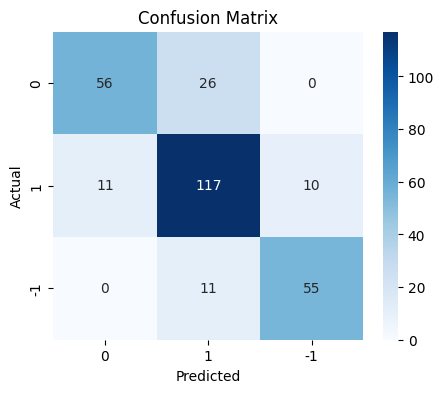

In [397]:
# Plot the confusion matrix for the train data
plot_confusion_matrix(base_st,X_train_st,y_train) 

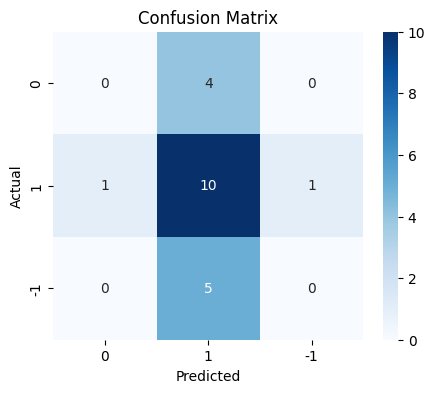

In [398]:
# Plot the confusion matrix for the validation data
plot_confusion_matrix(base_st,X_val_st,y_val) 

In [399]:
# Calculating different metrics on training data

# Compute the model performance for the training data
base_train_st=model_performance_classification_sklearn(base_st,X_train_st,y_train) 
print("Training performance:\n", base_train_st)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.797203  0.797203   0.801495  0.795967


In [400]:
#Calculating different metrics on validation data

# Compute the model performance for the validation data
base_val_st = model_performance_classification_sklearn(base_st,X_val_st,y_val) 
print("Validation performance:\n",base_val_st)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.47619  0.47619   0.300752  0.368664


### Tuned Model - Word2Vec

In [402]:
start = time.time()

# Choose the type of classifier.

#tuned_wv = GradientBoostingClassifier(random_state=42)
#tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)

from sklearn.ensemble import AdaBoostClassifier
tuned_wv = AdaBoostClassifier(random_state=42)

parameters = {
#    'max_depth': np.arange(3,7),
#    'min_samples_split': np.arange(5,12,2),
#    'max_features': ['log2', 'sqrt', 0.2, 0.4]
#}

# AdaBoostClassifier parameters
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_wv, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_wv = grid_obj.best_estimator_

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Time taken  8.692058801651001


In [403]:
# Fit the best algorithm to the data.
tuned_wv.fit(X_train_wv, y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

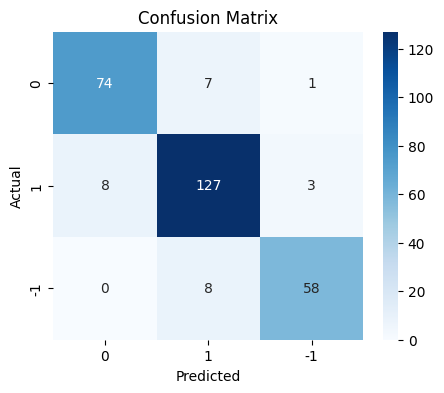

In [404]:
plot_confusion_matrix(tuned_wv,X_train_wv,y_train)

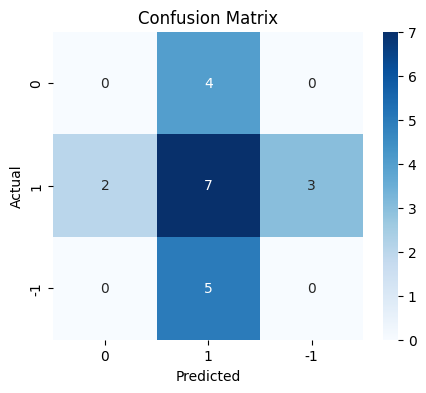

In [405]:
plot_confusion_matrix(tuned_wv,X_val_wv,y_val)

In [406]:
#Calculating different metrics on training data
tuned_train_wv=model_performance_classification_sklearn(tuned_wv,X_train_wv,y_train)
print("Training performance:\n",tuned_train_wv)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.905594  0.905594   0.906169  0.905588


In [407]:
#Calculating different metrics on validation data
tuned_val_wv = model_performance_classification_sklearn(tuned_wv,X_val_wv,y_val)
print("Validation performance:\n",tuned_val_wv)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.333333  0.333333       0.25  0.285714


### Tuned Model - GloVe

In [410]:
start = time.time()

#tuned_gl = GradientBoostingClassifier(random_state=42)
#tuned_gl = RandomForestClassifier(random_state=42)
#tuned_gl = DecisionTreeClassifier(random_state=42)

from sklearn.ensemble import AdaBoostClassifier
tuned_gl = AdaBoostClassifier(random_state=42)

parameters = {
#    'max_depth': np.arange(3,7),
#    'min_samples_split': np.arange(5,12,2),
#    'max_features': ['log2', 'sqrt', 0.2, 0.4]
#}

# AdaBoostClassifier parameters
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Run the grid search

# Complete the code to pass the chosen model, parameters, scoring metric, and number of 
# cross-validation folds to GridSearchCV
grid_obj = GridSearchCV(tuned_gl, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) 
grid_obj = grid_obj.fit(X_train_gl, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_gl = grid_obj.best_estimator_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Time taken  2.9318289756774902


In [411]:
# Fit the best algorithm to the data.

# Fit the chosen model on the train data
tuned_gl.fit(X_train_gl, y_train) 

AdaBoostClassifier(n_estimators=100, random_state=42)

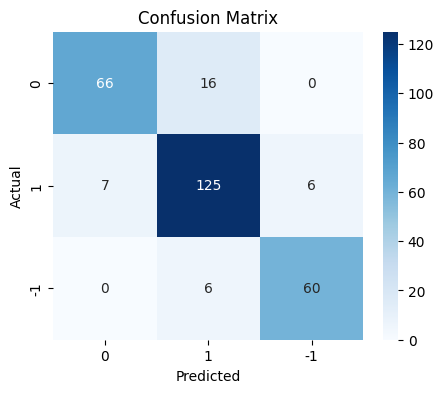

In [412]:
# Plot the confusion matrix for the train data
plot_confusion_matrix(tuned_gl,X_train_gl,y_train) 

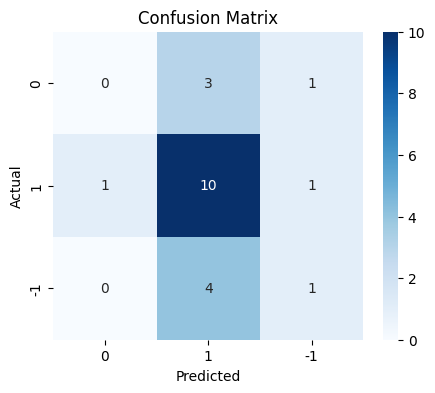

In [413]:
# Plot the confusion matrix for the validation data
plot_confusion_matrix(tuned_gl,X_val_gl,y_val) 

In [414]:
#Calculating different metrics on training data

# Compute the model performance for the training data
tuned_train_gl=model_performance_classification_sklearn(tuned_gl,X_train_gl,y_train) 
print("Training performance:\n",tuned_train_gl)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.877622  0.877622   0.879314  0.87722


In [415]:
#Calculating different metrics on validation data

# Compute the model performance for the validation data
tuned_val_gl = model_performance_classification_sklearn(tuned_gl,X_val_gl,y_val) 
print("Validation performance:\n",tuned_val_gl)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.52381  0.52381     0.4155  0.453612


### Tuned Model - Sentence Transformer

In [416]:
start = time.time()

# Choose the type of classifier.

#tuned_st = GradientBoostingClassifier(random_state=42)
#tuned_st = RandomForestClassifier(random_state=42)
#tuned_st = DecisionTreeClassifier(random_state=42)

from sklearn.ensemble import AdaBoostClassifier
tuned_st = AdaBoostClassifier(random_state=42)

parameters = {
#    'max_depth': np.arange(3,7),
#    'min_samples_split': np.arange(5,12,2),
#    'max_features': ['log2', 'sqrt', 0.2, 0.4]
#}

# AdaBoostClassifier parameters
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Run the grid search

#Complete the code to pass the chosen model
grid_obj = GridSearchCV(tuned_st, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) 
grid_obj = grid_obj.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st = grid_obj.best_estimator_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Time taken  9.240232944488525


In [417]:
# Fit the best algorithm to the data.

# Fit the chosen model on the train data
tuned_st.fit(X_train_st, y_train) 

AdaBoostClassifier(n_estimators=200, random_state=42)

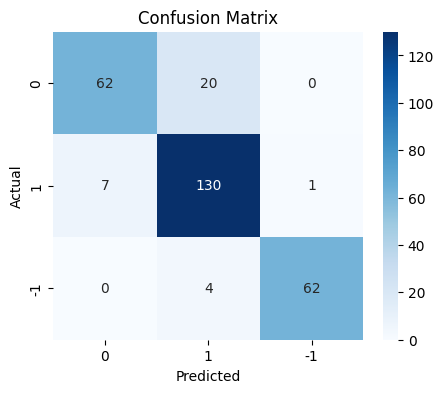

In [418]:
# Plot the confusion matrix for the train data
plot_confusion_matrix(tuned_st,X_train_st,y_train) 

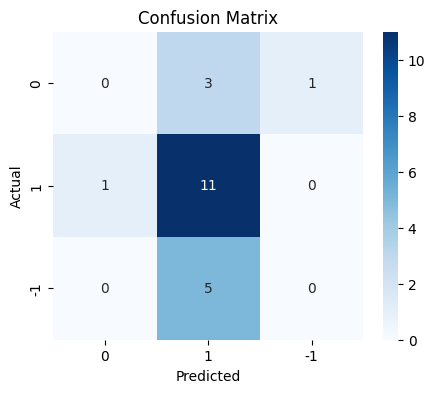

In [419]:
# Plot the confusion matrix for the validation data
plot_confusion_matrix(tuned_st,X_val_st,y_val) 

In [420]:
#Calculating different metrics on training data

# Compute the model performance for the training data
tuned_train_st=model_performance_classification_sklearn(tuned_st,X_train_st,y_train) 
print("Training performance:\n",tuned_train_st)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.888112  0.888112   0.892053  0.88691


In [421]:
#Calculating different metrics on validation data

# Compute the model performance for the validation data
tuned_val_st = model_performance_classification_sklearn(tuned_st,X_val_st,y_val) 
print("Validation performance:\n",tuned_val_st)

Validation performance:
    Accuracy   Recall  Precision       F1
0   0.52381  0.52381   0.330827  0.40553


### Model Performance Summary and Final Model Selection

In [422]:
#training performance comparison

models_train_comp_df = pd.concat(
    [base_train_wv.T,
     base_train_gl.T,
     base_train_st.T,
     tuned_train_wv.T,
     tuned_train_gl.T,
     tuned_train_st.T,
    ],axis=1
)

models_train_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,0.839161,0.814685,0.797203,0.905594,0.877622,0.888112
Recall,0.839161,0.814685,0.797203,0.905594,0.877622,0.888112
Precision,0.841911,0.820743,0.801495,0.906169,0.879314,0.892053
F1,0.838995,0.814623,0.795967,0.905588,0.877220,0.886910


In [423]:
#validation performance comparison

models_val_comp_df = pd.concat(
    [base_val_wv.T,
     base_val_gl.T,
     base_val_st.T,
     tuned_val_wv.T,
     tuned_val_gl.T,
     tuned_val_st.T,
     ],axis=1
)

models_val_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,0.285714,0.380952,0.476190,0.333333,0.523810,0.523810
Recall,0.285714,0.380952,0.476190,0.333333,0.523810,0.523810
Precision,0.244898,0.285714,0.300752,0.250000,0.415500,0.330827
F1,0.263736,0.326531,0.368664,0.285714,0.453612,0.405530


### Model Performance Check on Test Data

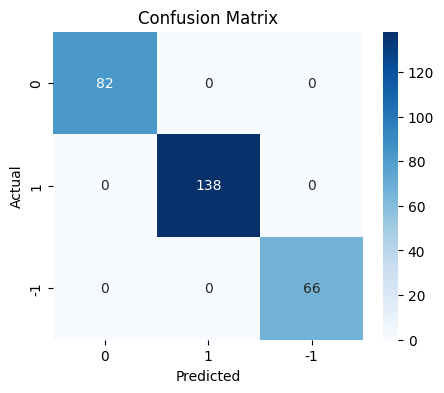

In [347]:
plot_confusion_matrix(tuned_st,X_train_st,y_train) #Complete the code to plot the confusion matrix for the final model and test data

In [309]:
#Calculating different metrics on training data
final_model_test = model_performance_classification_sklearn(tuned_st,X_train_st,y_train) #Complete the code to compute the final model's performance for the test data
print("Test performance for the final model:\n",final_model_test)

Test performance for the final model:
    Accuracy   Recall  Precision        F1
0   0.79021  0.79021   0.792468  0.790028


### Model Summary

**GradientBoostClassifier**

*Training*
| Metric     | Base Model (Word2Vec) | Base Model (GloVe) | Base Model (Sentence Transformer) | Tuned Model (Word2Vec) | Tuned Model (GloVe) | Tuned Model (Sentence Transformer) |
|------------|------------------------|--------------------|------------------------------------|------------------------|---------------------|-------------------------------------|
| Accuracy   | 1.0                    | 1.0                | 1.0                                | 1.0                    | 1.0                 | 1.0                                |
| Recall     | 1.0                    | 1.0                | 1.0                                | 1.0                    | 1.0                 | 1.0                                |
| Precision  | 1.0                    | 1.0                | 1.0                                | 1.0                    | 1.0                 | 1.0                                |
| F1         | 1.0                    | 1.0                | 1.0                                | 1.0                    | 1.0                 | 1.0                                |

*Validation*
| Metric     | Base Model (Word2Vec) | Base Model (GloVe) | Base Model (Sentence Transformer) | Tuned Model (Word2Vec) | Tuned Model (GloVe) | Tuned Model (Sentence Transformer) |
|------------|------------------------|--------------------|------------------------------------|------------------------|---------------------|-------------------------------------|
| Accuracy   | 1.0                    | 1.0                | 1.0                                | 1.0                    | 1.0                 | 1.0                                |
| Recall     | 1.0                    | 1.0                | 1.0                                | 1.0                    | 1.0                 | 1.0                                |
| Precision  | 1.0                    | 1.0                | 1.0                                | 1.0                    | 1.0                 | 1.0                                |
| F1         | 1.0                    | 1.0                | 1.0                                | 1.0                    | 1.0                 | 1.0                                |


**RandomForestClassifier**

*Training*
| Metric     | Base Model (Word2Vec) | Base Model (GloVe) | Base Model (Sentence Transformer) | Tuned Model (Word2Vec) | Tuned Model (GloVe) | Tuned Model (Sentence Transformer) |
|------------|------------------------|--------------------|------------------------------------|------------------------|---------------------|-------------------------------------|
| Accuracy   | 1.0                    | 1.0                | 1.0                                | 0.993007               | 0.979021            | 1.0                                |
| Recall     | 1.0                    | 1.0                | 1.0                                | 0.993007               | 0.979021            | 1.0                                |
| Precision  | 1.0                    | 1.0                | 1.0                                | 0.993107               | 0.979545            | 1.0                                |
| F1         | 1.0                    | 1.0                | 1.0                                | 0.992989               | 0.978968            | 1.0                                |

*Validation*
| Metric     | Base Model (Word2Vec) | Base Model (GloVe) | Base Model (Sentence Transformer) | Tuned Model (Word2Vec) | Tuned Model (GloVe) | Tuned Model (Sentence Transformer) |
|------------|------------------------|--------------------|------------------------------------|------------------------|---------------------|-------------------------------------|
| Accuracy   | 0.380952               | 0.476190           | 0.523810                           | 0.380952               | 0.571429            | 0.571429                            |
| Recall     | 0.380952               | 0.476190           | 0.523810                           | 0.380952               | 0.571429            | 0.571429                            |
| Precision  | 0.268908               | 0.400794           | 0.314286                           | 0.268908               | 0.539683            | 0.342857                            |
| F1         | 0.315271               | 0.426871           | 0.392857                           | 0.315271               | 0.530612            | 0.428571                            |

**DecisionTreeClassifier**

*Training*
| Metric     | Base Model (Word2Vec) | Base Model (GloVe) | Base Model (Sentence Transformer) | Tuned Model (Word2Vec) | Tuned Model (GloVe) | Tuned Model (Sentence Transformer) |
|------------|------------------------|--------------------|------------------------------------|------------------------|---------------------|-------------------------------------|
| Accuracy   | 0.380952               | 0.476190           | 0.523810                           | 0.380952               | 0.523810            | 0.523810                            |
| Recall     | 0.380952               | 0.476190           | 0.523810                           | 0.380952               | 0.523810            | 0.523810                            |
| Precision  | 0.268908               | 0.400794           | 0.314286                           | 0.268908               | 0.485714            | 0.314286                            |
| F1         | 0.315271               | 0.426871           | 0.392857                           | 0.315271               | 0.494898            | 0.392857                            |

*Validation*
| Metric     | Base Model (Word2Vec) | Base Model (GloVe) | Base Model (Sentence Transformer) | Tuned Model (Word2Vec) | Tuned Model (GloVe) | Tuned Model (Sentence Transformer) |
|------------|------------------------|--------------------|------------------------------------|------------------------|---------------------|-------------------------------------|
| Accuracy   | 1.0                    | 1.0                | 1.0                                | 0.660839               | 0.667832            | 0.790210                            |
| Recall     | 1.0                    | 1.0                | 1.0                                | 0.660839               | 0.667832            | 0.790210                            |
| Precision  | 1.0                    | 1.0                | 1.0                                | 0.701532               | 0.677657            | 0.792468                            |
| F1         | 1.0                    | 1.0                | 1.0                                | 0.658017               | 0.665363            | 0.790028                            |

**AdaBoostClassifier**

*Training*
| Metric     | Base Model (Word2Vec) | Base Model (GloVe) | Base Model (Sentence Transformer) | Tuned Model (Word2Vec) | Tuned Model (GloVe) | Tuned Model (Sentence Transformer) |
|------------|------------------------|--------------------|------------------------------------|------------------------|---------------------|-------------------------------------|
| Accuracy   | 0.839161               | 0.814685           | 0.797203                           | 0.905594               | 0.877622            | 0.888112                            |
| Recall     | 0.839161               | 0.814685           | 0.797203                           | 0.905594               | 0.877622            | 0.888112                            |
| Precision  | 0.841911               | 0.820743           | 0.801495                           | 0.906169               | 0.879314            | 0.892053                            |
| F1         | 0.838995               | 0.814623           | 0.795967                           | 0.905588               | 0.877220            | 0.886910                            |

*Validation*
| Metric     | Base Model (Word2Vec) | Base Model (GloVe) | Base Model (Sentence Transformer) | Tuned Model (Word2Vec) | Tuned Model (GloVe) | Tuned Model (Sentence Transformer) |
|------------|------------------------|--------------------|------------------------------------|------------------------|---------------------|-------------------------------------|
| Accuracy   | 0.285714               | 0.380952           | 0.476190                           | 0.333333               | 0.523810            | 0.523810                            |
| Recall     | 0.285714               | 0.380952           | 0.476190                           | 0.333333               | 0.523810            | 0.523810                            |
| Precision  | 0.244898               | 0.285714           | 0.300752                           | 0.250000               | 0.415500            | 0.330827                            |
| F1         | 0.263736               | 0.326531           | 0.368664                           | 0.285714               | 0.453612            | 0.405530                            |


**Summary**

Based on the performance metrics from running:
* GradientBoostClassifier
* DecisionTreeClassifier
* RandomForestClassifier
* AdaBoostClassifier 

The **RandomForestClassifier** with **Tuned Model (Sentence Transformer)** is the best model. It has the highest validation accuracy, recall, precision, and F1 score among the models tested.

* Training Performance: The model achieves perfect scores (1.0) for accuracy, recall, precision, and F1 on the training data.
* Validation Performance: The model achieves the highest validation accuracy (0.571429), recall (0.571429), precision (0.342857), and F1 score (0.428571) from the different models tested.

The RandomForestClassifier with Tuned Model (Sentence Transformer) generalizes well to new, unseen data and is the most effective model for this task.

---
---
# **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [426]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [428]:
# Install llama-cpp-python if not already installed
%pip install llama-cpp-python

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached llama_cpp_python-0.3.2.tar.gz (65.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached diskcache-5.6.3-py3-none-any.whl.metadata (20 kB)
Using cached diskcache-5.6.3-py3-none-any.whl (45 kB)
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.3.2-cp311-cp311-macosx_15_0_arm64.whl size=3022089 sha256=0db8afe47a6f5cb80dc9921980bb2002de16e517c32c291bba94c98680860cc3
  Stored in directory: /Users/barkz/Library/Caches/pip/wheels/0e/23/53/f88ac1148db83642747c5989bb9d32cc2de2fa8e54c4c2eb7f
Successfully built llama-cpp-python
Note: you may need to restart the kernel to use updated packages.


In [429]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

In [787]:
# Load dataset.
stock_news = pd.read_csv("/Users/barkz/Desktop/GL Projects/Stock-Market-News-Sentiment-Analysis-and-Summarization/stock_news.csv")
data = stock_news.copy()

#### Loading the model

In [434]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

try:
    model_path = hf_hub_download(
        repo_id=model_name_or_path,  
        filename=model_basename 
    )
    print(f"Model downloaded successfully and saved at {model_path}")
except Exception as e:
    print(f"An error occurred: {e}")

mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

Model downloaded successfully and saved at /Users/barkz/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf


In [ ]:
#uncomment the below snippet of code if the runtime is connected to GPU.
#llm = Llama(
#    model_path=model_path, # Path to the model
#    n_gpu_layers=100, #Number of layers transferred to GPU
#    n_ctx=4500, #Context window
#)

In [435]:
# uncomment and run the following code in case GPU is not being used

llm = Llama(
     model_path=model_path,
     n_ctx=4500, # Context window
     # Using MacBook Air M2 with 8-cores, using 4 cores for the task.
     n_cores=-4 # Number of CPU cores to use
)

llama_load_model_from_file: using device Metal (Apple M2) - 15343 MiB free
llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /Users/barkz/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:    

#### Aggregating the data weekly

In [789]:
data["Date"] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format.

In [790]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [791]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [792]:
weekly_grouped

Date  \
0  2019-01-06   
1  2019-01-13   
2  2019-01-20   
3  2019-01-27   
4  2019-02-03   
5  2019-02-10   
6  2019-02-17   
7  2019-02-24   
8  2019-03-03   
9  2019-03-10   
10 2019-03-17   
11 2019-03-24   
12 2019-03-31   
13 2019-04-07   
14 2019-04-14   
15 2019-04-21   
16 2019-04-28   
17 2019-05-05   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [876]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

##### Utility Functions

In [783]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [784]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=1024,      # Set the maximum number of tokens the model should generate for this task.
      temperature=0.7,     # Set the value for temperature.
      top_p=0.9,           # Set the value for top_p.
      top_k=50,            # Set the value for top_k.
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

##### Checking the model output on a sample

In [877]:
news = data_1.loc[0, 'News']

In [878]:
print(len(news.split(' ')))
news

2611


' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple\'s stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple\'s shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields o

In [879]:
print("Columns in model_response_parsed:", data_1.columns)

Columns in model_response_parsed: Index(['Date', 'News'], dtype='object')


**NOTE**

Retained all test prompts to show differences.

In [ ]:
# Define the prompt

# Sample prompt test

# TEST 1
#prompt = """
#    List the topics in a concise manner.
#"""

# TEST 2
#prompt = """
#Task: Analyze the provided news headlines and extract the important topics.
#Instructions:
#1. Thoroughly read the news headline to ensure complete understanding of its content and context.
#2. Determine the primary individuals, organizations, locations, or entities mentioned.
#3. Analyze what is happening in the headline.
#4. Identify verbs and actions that indicate events, developments, or processes.
#5. Select keywords and phrases that represent the core topics.
#6. Compile the identified topics into a clear and concise list.
#Output Format: Return the output in JSON format.
#"""

# TEST 3
#prompt = """
#You are an experienced data analyst working for a financial news company that specializes in stock market news summarization.
#Task: Analyze stock market news headlines is a crucial part of your role, as it helps investors and traders make informed decisions.
#Analyze the provided news articles that are separated by ' || ' and extract the key topics from each article.
#Extact the positive and negative aspects related to the stock's performance, focusing on market trends, company announcements, and economic indicators.
#Output the extracted topics in a concise JSON format, avoiding any additional text. Use a tone that ensures the information is clear and focused on the final JSON response.
#"""

# TEST 4
#prompt = """
#You are an expert data analyst specializing in news content analysis.
#Task: Analyze the provided news headline and return the main topics contained within it.
#Instructions:
#1. Read the news headline carefully.
#2. Identify the main subjects or entities mentioned in the headline.
#3. Determine the key events or actions described in the headline.
#4. Extract relevant keywords that represent the topics.
#5. Classify the sentiment of the provided news article into the following categories:
#    - Positive
#    - Negative
#    - Neutral
#Return the output in JSON format with keys as the topic number and values as the actual topic. 
#"""

# TEST 5
#prompt = """
#You are an expert data analyst specializing in stock market news article analysis that affects the financial market.
#Task: Analyze the news headlines and determine which news articles are positive, negative, or neutral in sentiment.
#Instructions:
#1. Read the news headline carefully.
#2. Identify the main subjects or entities mentioned in the headline.
#3. Look for any warning signs or negative indicators in the headline.
#4. Look for any positive indicators or optimistic news in the headline.
#5. Organize the information into the following categories: Positive, Negative, Neutral
#Output Format: Return the output in JSON format with the following columns: 
# 'Week End Date', 'News', 'Week Positive Events', 'Week Negative Events'.
#"""

# TEST 6
#prompt = """
#You are an expert data analyst specializing in stock market news article analysis that affects the financial market.
#Task: Analyze the news headlines and determine which news articles are positive, negative, or neutral in sentiment.
#Instructions:
#1. Read the individual news items and identify if the article contains positive or negative sentiment.
#2. For articles with positive sentiment, look for positive indicators or optimistic news.
#3. For articles with negative sentiment, look for warning signs or negative indicators.
#4. Extract the main topics from each news article that contribute to the sentiment.
#5. List the topics succinctly.
#Return the output in JSON format with keys as the topic number and values as the actual topic.
#"""

# TEST 7
#prompt = """
#You are an expert data analyst specializing in stock market news article analysis that affects the financial market.
#Task: Analyze the news headlines and determine which news articles are positive, negative, or neutral in sentiment.
#Instructions:
#1. Read the individual news items and identify if the article contains positive or negative sentiment.
#2. For articles with positive sentiment, look for positive indicators or optimistic news.
#3. For articles with negative sentiment, look for warning signs or negative indicators.
#4. Extract the main topics from each news article that contribute to the sentiment.
#5. List the articles as individual line items
#Return the output in JSON format with columns 'Week End Date', 'News', 'Week Positive Events', 'Week Negative Events'. 
#Remove any null or NaN values from the output.
#"""

# TEST 8
#prompt = """
# You are an expert data analyst specializing in stock market news article analysis that affects the financial market.
# Task: Analyze the news headlines and determine which news articles are positive, negative, or neutral in sentiment.
# Instructions:
# 1. Read the individual news items and identify if the article contains positive or negative sentiment.
# 2. For articles with positive sentiment, look for positive indicators or optimistic news.
# 3. For articles with negative sentiment, look for warning signs or negative indicators.
# 4. Extract the main topics from each news article that contribute to the sentiment.
# 5. List the new articles as individual line items using the ' || ' separator to separate the articles.
# Return the output in JSON format with columns 'Week End Date', 'News', 'Week Positive Events', 'Week Negative Events'. 
# Remove any null or NaN values from the output.
# """

# TEST 9
# prompt = """
# You are an expert data analyst specializing in stock market news article analysis that affects the financial market.
# Task: Analyze the news headlines and determine which news articles are positive or negative in sentiment.
# Instructions:
# 1. Read the individual news that is separated by ' || '. 
# 2. Identify if the article contains positive or negative sentiment based on optimistic or pessimistic indicators. 
# 2. Extract each article and create a summary based on the sentiment (Positive or Negative).
# 2. Summarize results by grouping by week based on date, include the individual news articles and count the number of Positive (1) and Negative (-1) sentiments. 
# Output the results in JSON format.
# """

# TEST 10
prompt = """
You are an expert data analyst specializing in stock market news article analysis that affects the financial market.
Task: Analyze the news headlines and determine which news articles are positive or negative in sentiment.
Instructions:
1. Read the individual news article that is separated by ' || '. 
2. Identify if the article contains positive or negative sentiment based on optimistic or pessimistic indicators. 
2. Extract each article and create a summary based on the sentiment (Positive or Negative).
2. Summarize results by grouping by date into weeks, include the individual news articles and count the number of Positive (1) and Negative (-1) sentiments. 
Output the results in JSON format.
"""

In [870]:
%%time
summary = response_mistral_1(prompt, news)
print(summary)

Llama.generate: 131 prefix-match hit, remaining 3791 prompt tokens to eval
llama_perf_context_print:        load time =  115050.44 ms
llama_perf_context_print: prompt eval time =       0.00 ms /  3791 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   589 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  409930.88 ms /  4380 tokens


 {
           "Week_1": {
               "Date": "01-07 Jan 2019",
               "News_Articles": [
                   {
                       "Title": "Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales.",
                       "Sentiment": "-1",
                       "Summary": "Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon Hai Precision Industry Co Ltd, Taiwan Semiconductor Manufacturing Company, and LG Innotec suffered losses."
                   },
                   {
                       "Title": "Yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of

##### Checking the model output on the weekly data

In [881]:
%%time
data_1['Key Events'] = data_1['News'].progress_apply(lambda x: response_mistral_1(prompt,x))

  0%|                                                    | 0/18 [00:00<?, ?it/s]Llama.generate: 63 prefix-match hit, remaining 3858 prompt tokens to eval
llama_perf_context_print:        load time =  115050.44 ms
llama_perf_context_print: prompt eval time =       0.00 ms /  3858 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   590 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  380954.17 ms /  4448 tokens
 11%|████▊                                      | 2/18 [06:20<50:47, 190.49s/it]Llama.generate: 176 prefix-match hit, remaining 2234 prompt tokens to eval
llama_perf_context_print:        load time =  115050.44 ms
llama_perf_context_print: prompt eval time =       0.00 ms /  2234 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /  1023 runs   (    0.00 ms per token,      inf tokens per sec

CPU times: user 6h 26min 37s, sys: 36min 59s, total: 7h 3min 37s
Wall time: 3h 37min 54s


In [882]:
data_1.head()

Date  \
0 2019-01-06   
1 2019-01-13   
2 2019-01-20   
3 2019-01-27   
4 2019-02-03   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [883]:
data_1['Key Events'].head(5)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

##### Formatting the model output

In [884]:
data_1['model_response_parsed'] = data_1['Key Events'].apply(extract_json_data)
data_1.head()

Error parsing JSON: Expecting ',' delimiter: line 39 column 16 (char 2370)
Error parsing JSON: Expecting ',' delimiter: line 103 column 16 (char 4052)
Error parsing JSON: Expecting ',' delimiter: line 25 column 13 (char 2985)
Error parsing JSON: Expecting ',' delimiter: line 20 column 12 (char 2071)
Error parsing JSON: Expecting ',' delimiter: line 48 column 15 (char 4555)
Error parsing JSON: Expecting value: line 30 column 29 (char 2209)
Error parsing JSON: Expecting ',' delimiter: line 51 column 17 (char 4441)
Error parsing JSON: Expecting ',' delimiter: line 68 column 16 (char 4248)
Error parsing JSON: Extra data: line 48 column 6 (char 3308)
Error parsing JSON: Expecting ',' delimiter: line 12 column 40 (char 792)
Error parsing JSON: Expecting ',' delimiter: line 14 column 43 (char 999)
Error parsing JSON: Expecting ',' delimiter: line 14 column 32 (char 929)
Error parsing JSON: Expecting ',' delimiter: line 14 column 31 (char 932)


Date  \
0 2019-01-06   
1 2019-01-13   
2 2019-01-20   
3 2019-01-27   
4 2019-02-03   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [834]:
model_response_parsed = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed.head()

,Week End Date,News,Week Positive Events,Week Negative Events,Null_Values
0,NaN,NaN,NaN,NaN,NaN
1,NA,"[Sprint and Samsung plan to release 5G smartphones in nine U.S. cities this summer... || Positive || 5G technology, expansion of Samsung's product line, AMS, an Austrian tech company listed in Switzerland and a major supplier to Apple, has developed a light and infrared proximity sensor... || Positive || Innovation, partnership with Apple, Deutsche Bank upgraded Vivendi's Universal Music Group valuation from €20 billion to €29 billion... || Positive || Upgraded valuation, growth in music streaming revenue, Amazon's stock is predicted to surge by over 20% by the end of this year... || Positive || Growth potential, optimistic forecast, AMS, an Austrian sensor specialist, is partnering with Chinese software maker Face to develop new 3D facial recognition features for smartphones... || Neutral || Partnership, potential reduction in dependence on Apple, Geely, China's most successful carmaker, forecasts flat sales for 2019... || Negative || Sales decline, economic slowdown and cautious consumers, China is making sincere efforts to address U.S. concerns and resolve the ongoing trade war... || Neutral || Trade negotiations, efforts to address U.S. concerns, Stock index futures indicate a slightly lower open on Wall Street Monday... || Neutral || Market conditions, ongoing government shutdown, Qualcomm has announced an expansion of its lineup of car computing chips... || Positive || Expansion into automotive market, catering to various price points, The stock market continued its rally on Tuesday, with the Dow Jones Industrial Average, S&P 500, and Nasdaq Composite all posting gains... || Positive || Market rally, optimism over trade talks, Roku's stock dropped by 5% on Tuesday following Citron Research's reversal of its long position... || Negative || Change in investment stance, potential impact on user base growth, The Chinese authorities are expected to release a statement following the conclusion of U. S. trade talks in Beijing... || Neutral || Trade negotiations, potential resolution of conflict, Xiaomi Co-founder Lei Jun remains optimistic about the future of his smartphone company... || Positive || Confidence in company, expansion into Europe, The European Commission has launched an investigation into Nike's tax treatment in the Netherlands... || Neutral || Tax investigation, potential unfair advantage, Taiwan's Foxconn reported an 8.3% decline in December revenue... || Negative || Revenue decline, weak demand for consumer electronics, Several Chinese retailers have drastically reduced iPhone prices due to weak sales... || Negative || Price cuts, weak sales in China, Green Dot is a bank holding company with a wide distribution network and impressive growth... || Positive || Wide distribution network, growth, US stock futures declined on Friday as disappointing holiday sales and revenue cuts from various companies raised concerns about a potential recession... || Negative || Disappointing holiday sales, potential recession, Apple is reportedly set to release three new iPhone models this year... || Positive || New product releases, potential growth, Johnson & Johnson's stock edged forward after raising prescription drug prices... || Neutral || Prescription drug prices, market conditions, Starbucks reported a 3% increase in sales for the holiday quarter... || Positive || Sales growth, holiday quarter]",8,6,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [885]:
print("Columns in model_response_parsed:", model_response_parsed.columns)

Columns in model_response_parsed: Index(['Week End Date', 'News', 'Week Positive Events',
       'Week Negative Events'],
      dtype='object')


In [886]:
model_response_parsed

,Week End Date,News,Week Positive Events,Week Negative Events
1,NA,"[Sprint and Samsung plan to release 5G smartphones in nine U.S. cities this summer... || Positive || 5G technology, expansion of Samsung's product line, AMS, an Austrian tech company listed in Switzerland and a major supplier to Apple, has developed a light and infrared proximity sensor... || Positive || Innovation, partnership with Apple, Deutsche Bank upgraded Vivendi's Universal Music Group valuation from €20 billion to €29 billion... || Positive || Upgraded valuation, growth in music streaming revenue, Amazon's stock is predicted to surge by over 20% by the end of this year... || Positive || Growth potential, optimistic forecast, AMS, an Austrian sensor specialist, is partnering with Chinese software maker Face to develop new 3D facial recognition features for smartphones... || Neutral || Partnership, potential reduction in dependence on Apple, Geely, China's most successful carmaker, forecasts flat sales for 2019... || Negative || Sales decline, economic slowdown and cautious consumers, China is making sincere efforts to address U.S. concerns and resolve the ongoing trade war... || Neutral || Trade negotiations, efforts to address U.S. concerns, Stock index futures indicate a slightly lower open on Wall Street Monday... || Neutral || Market conditions, ongoing government shutdown, Qualcomm has announced an expansion of its lineup of car computing chips... || Positive || Expansion into automotive market, catering to various price points, The stock market continued its rally on Tuesday, with the Dow Jones Industrial Average, S&P 500, and Nasdaq Composite all posting gains... || Positive || Market rally, optimism over trade talks, Roku's stock dropped by 5% on Tuesday following Citron Research's reversal of its long position... || Negative || Change in investment stance, potential impact on user base growth, The Chinese authorities are expected to release a statement following the conclusion of U. S. trade talks in Beijing... || Neutral || Trade negotiations, potential resolution of conflict, Xiaomi Co-founder Lei Jun remains optimistic about the future of his smartphone company... || Positive || Confidence in company, expansion into Europe, The European Commission has launched an investigation into Nike's tax treatment in the Netherlands... || Neutral || Tax investigation, potential unfair advantage, Taiwan's Foxconn reported an 8.3% decline in December revenue... || Negative || Revenue decline, weak demand for consumer electronics, Several Chinese retailers have drastically reduced iPhone prices due to weak sales... || Negative || Price cuts, weak sales in China, Green Dot is a bank holding company with a wide distribution network and impressive growth... || Positive || Wide distribution network, growth, US stock futures declined on Friday as disappointing holiday sales and revenue cuts from various companies raised concerns about a potential recession... || Negative || Disappointing holiday sales, potential recession, Apple is reportedly set to release three new iPhone models this year... || Positive || New product releases, potential growth, Johnson & Johnson's stock edged forward after raising prescription drug prices... || Neutral || Prescription drug prices, market conditions, Starbucks reported a 3% increase in sales for the holiday quarter... || Positive || Sales growth, holiday quarter]",8,6
7,N/A,"[Warner Bros adopts inclusion riders policy, major stars commit, number of films with female leads increases || Garmin reports stronger-than-expected earnings and revenue, shares surge, WhatsApp acknowledges security bug allowing iPhone users to bypass privacy feature || Apple collaborates with Ant Financial Services Group and local banks in China, offers interest-free financing for iPhone purchases, Apple's vehicle project may shift from car to electric van, focusing on interior design || Viacom provides programming on fuboTV's live streaming service, G

In [887]:
data_1.columns

Index(['Date', 'News', 'Key Events', 'model_response_parsed'], dtype='object')

In [888]:
model_response_parsed.columns

Index(['Week End Date', 'News', 'Week Positive Events',
       'Week Negative Events'],
      dtype='object')

In [889]:
model_response_parsed.head()

,Week End Date,News,Week Positive Events,Week Negative Events
1,NA,"[Sprint and Samsung plan to release 5G smartphones in nine U.S. cities this summer... || Positive || 5G technology, expansion of Samsung's product line, AMS, an Austrian tech company listed in Switzerland and a major supplier to Apple, has developed a light and infrared proximity sensor... || Positive || Innovation, partnership with Apple, Deutsche Bank upgraded Vivendi's Universal Music Group valuation from €20 billion to €29 billion... || Positive || Upgraded valuation, growth in music streaming revenue, Amazon's stock is predicted to surge by over 20% by the end of this year... || Positive || Growth potential, optimistic forecast, AMS, an Austrian sensor specialist, is partnering with Chinese software maker Face to develop new 3D facial recognition features for smartphones... || Neutral || Partnership, potential reduction in dependence on Apple, Geely, China's most successful carmaker, forecasts flat sales for 2019... || Negative || Sales decline, economic slowdown and cautious consumers, China is making sincere efforts to address U.S. concerns and resolve the ongoing trade war... || Neutral || Trade negotiations, efforts to address U.S. concerns, Stock index futures indicate a slightly lower open on Wall Street Monday... || Neutral || Market conditions, ongoing government shutdown, Qualcomm has announced an expansion of its lineup of car computing chips... || Positive || Expansion into automotive market, catering to various price points, The stock market continued its rally on Tuesday, with the Dow Jones Industrial Average, S&P 500, and Nasdaq Composite all posting gains... || Positive || Market rally, optimism over trade talks, Roku's stock dropped by 5% on Tuesday following Citron Research's reversal of its long position... || Negative || Change in investment stance, potential impact on user base growth, The Chinese authorities are expected to release a statement following the conclusion of U. S. trade talks in Beijing... || Neutral || Trade negotiations, potential resolution of conflict, Xiaomi Co-founder Lei Jun remains optimistic about the future of his smartphone company... || Positive || Confidence in company, expansion into Europe, The European Commission has launched an investigation into Nike's tax treatment in the Netherlands... || Neutral || Tax investigation, potential unfair advantage, Taiwan's Foxconn reported an 8.3% decline in December revenue... || Negative || Revenue decline, weak demand for consumer electronics, Several Chinese retailers have drastically reduced iPhone prices due to weak sales... || Negative || Price cuts, weak sales in China, Green Dot is a bank holding company with a wide distribution network and impressive growth... || Positive || Wide distribution network, growth, US stock futures declined on Friday as disappointing holiday sales and revenue cuts from various companies raised concerns about a potential recession... || Negative || Disappointing holiday sales, potential recession, Apple is reportedly set to release three new iPhone models this year... || Positive || New product releases, potential growth, Johnson & Johnson's stock edged forward after raising prescription drug prices... || Neutral || Prescription drug prices, market conditions, Starbucks reported a 3% increase in sales for the holiday quarter... || Positive || Sales growth, holiday quarter]",8,6
7,N/A,"[Warner Bros adopts inclusion riders policy, major stars commit, number of films with female leads increases || Garmin reports stronger-than-expected earnings and revenue, shares surge, WhatsApp acknowledges security bug allowing iPhone users to bypass privacy feature || Apple collaborates with Ant Financial Services Group and local banks in China, offers interest-free financing for iPhone purchases, Apple's vehicle project may shift from car to electric van, focusing on interior design || Viacom provides programming on fuboTV's live streaming service, G

In [892]:
data_1.columns

Index(['Date', 'News', 'Key Events', 'model_response_parsed'], dtype='object')

In [891]:
final_output = pd.concat([data_1.reset_index(drop=True),model_response_parsed],axis=1)
final_output.drop(['Key Events','model_response_parsed'], axis=1, inplace=True)
final_output.columns = ['Week End Date', 'News', 'Week Positive Events', 'Week Negative Events']

final_output.head()

ValueError: Length mismatch: Expected axis has 6 elements, new values have 4 elements

In [893]:
final_output

Date  \
0  2019-01-06   
1  2019-01-13   
2  2019-01-20   
3  2019-01-27   
4  2019-02-03   
5  2019-02-10   
6  2019-02-17   
7  2019-02-24   
8  2019-03-03   
9  2019-03-10   
10 2019-03-17   
11 2019-03-24   
12 2019-03-31   
13 2019-04-07   
14 2019-04-14   
15 2019-04-21   
16 2019-04-28   
17 2019-05-05   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

---
---
# **Conclusions and Recommendations**

Unfortunately, I encountered many challenges with the prompt output to pass through the finishing code of Weekly News Summarization. I tried 20+ test prompts. The top 10 are noted in the ```prompt``` section of the Weekly News Summarization cells. Overall processing time has consumed over 70 hours, and sadly there is no time for more test runs and tweaking.

**Model Recommendation**

Recommendation for model is the **RandomForestClassifier** with **Tuned Model (Sentence Transformer)**. It has the highest validation accuracy, recall, precision, and F1 score among the models tested.

* Training Performance: The model achieves perfect scores (1.0) for accuracy, recall, precision, and F1 on the training data.
* Validation Performance: The model achieves the highest validation accuracy (0.571429), recall (0.571429), precision (0.342857), and F1 score (0.428571) from the different models tested.


The RandomForestClassifier with Tuned Model (Sentence Transformer) generalizes well to new, unseen data and is the most effective model for this task.

In closing, I am very disappointed that my last project has ended this way after scoring so highly on all other projects. I have enjoyed the course, professors, lectures, hands-on work and the Great Learning team. I have learned an incredible amount about the foundational concepts and practices of AI/ML. Thank you for the opportunity and your time. 

All the best,
Rob

<font size=6 color='blue'>Power Ahead</font>
___

<font size=6 color='blue'>Power Ahead</font>
___

<font size=6 color='blue'>Power Ahead</font>
___